In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras

In [118]:
train_dir="sign_data_ver1/train/"
test_dir="sign_data_ver1/test/"

In [119]:
size = 224
        

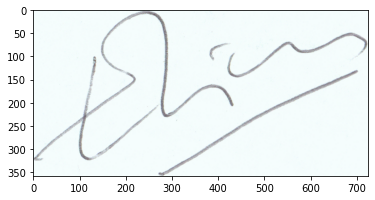

In [120]:
import matplotlib.pyplot as plt
img = plt.imread('sign_data_ver1/train/001/001_01.PNG')
plt.imshow(img)

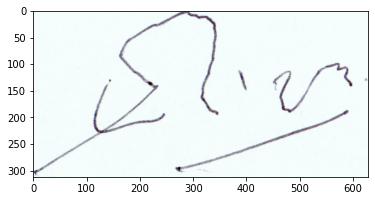

In [121]:
img1 = plt.imread('sign_data_ver1/train/001_forg/0119001_01.png')
plt.imshow(img1)

In [122]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir('sign_data_ver1/train/'):

    for data in glob.glob('sign_data_ver1/train/'+per+'/*.*'):
        img = cv2.imread(data,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (size, size))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('sign_data_ver1/test/'):
    for data in glob.glob('sign_data_ver1/test/'+per+'/*.*'):
        img = cv2.imread(data,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (size, size))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(1)
        else:
            test_labels.append(0)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [123]:
# from keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [124]:
train_labels

array([0, 0, 0, ..., 1, 1, 1])

In [125]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [126]:
train_data.shape


(1649, 1, 224, 224, 3)

In [127]:
test_data.shape

(500, 1, 224, 224, 3)

In [128]:
train_data = train_data.reshape(-1, size,size, 3)
test_data = test_data.reshape(-1, size,size, 3)

# train_data = np.asarray(train_labels).astype('float32').reshape((-1,1))
# test_data = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [129]:
train_data.shape

(1649, 224, 224, 3)

In [130]:
test_data.shape

(500, 224, 224, 3)

In [131]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [132]:

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet'
                                               )
base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

network = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.001
network.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
network.summary()
              

94765736/94765736 [==============================] - 13s 0us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [133]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]

EPOCHS = 10
BS = 1
progess = network.fit(train_data, train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.01)

Epoch 1/10
  89/1632 [>.............................] - ETA: 4:06 - loss: 0.7445 - accuracy: 0.5281

KeyboardInterrupt: 

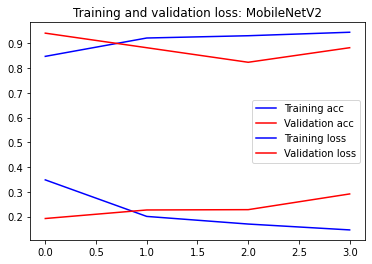

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss: MobileNetV2')
plt.legend()
 
plt.show()
 
plt.figure()

In [ ]:
pred = network.predict(test_data)

16/16 [==============================] - 13s 712ms/step


In [ ]:
pred  #prob of genuine, prob of forged

array([[-2.30706048e+00,  2.71605301e+00],
       [ 1.06536827e+01, -9.98994541e+00],
       [ 2.88706374e+00, -2.91217828e+00],
       [ 4.12495184e+00, -3.75170088e+00],
       [ 3.97539330e+00, -4.10881376e+00],
       [ 6.69001245e+00, -6.59015369e+00],
       [ 6.95762777e+00, -6.61040211e+00],
       [-4.46025467e+00,  4.18335915e+00],
       [ 3.75699544e+00, -3.54556608e+00],
       [ 4.66378689e+00, -4.62421942e+00],
       [-6.78312635e+00,  6.62860823e+00],
       [-1.86228299e+00,  2.12378883e+00],
       [-1.98250175e+00,  2.64232111e+00],
       [-3.50616837e+00,  3.61000466e+00],
       [-5.24296582e-01,  3.78871977e-01],
       [-2.63738894e+00,  2.28350377e+00],
       [ 3.88140917e+00, -4.18534231e+00],
       [ 6.70739889e+00, -6.70263767e+00],
       [-1.86258304e+00,  2.51298809e+00],
       [-3.70482230e+00,  3.56306887e+00],
       [ 5.15392828e+00, -4.55417490e+00],
       [ 5.95534801e+00, -4.92946577e+00],
       [-1.22932780e+00,  1.03773773e+00],
       [ 1.

In [ ]:
test_loss, test_acc = network.evaluate(test_data, test_labels, verbose=1) 
print("Test Accuracy:", test_acc)

16/16 [==============================] - 13s 716ms/step - loss: 0.1604 - accuracy: 0.9400
Test Accuracy: 0.9399999976158142


In [ ]:
# network.save("ver1_mobilenetv2.h5")  #saving the model